<br>

####   hw6pr2digits_modeler 
+ digits clasification -- and regression -- via NNets


#### Predict pixel 42 (regression)...


In [7]:
# libraries...
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [8]:
# let's read in our flower data...
# 
# digits_cleaned.csv and hw4pr1iris_cleaner.ipynb should be in this folder
# 
filename = 'digits_cleaned.csv'
df_tidy = pd.read_csv(filename)      # encoding = "utf-8", "latin1"
print(f"{filename} : file read into a pandas dataframe.")

digits_cleaned.csv : file read into a pandas dataframe.


In [9]:
#
# different version vary on how to see all rows (adapt to suit your system!)
#
print(f"df_tidy.shape is {df_tidy.shape}\n")
df_tidy.info()  # prints column information

# let's print the whole dataframe, too  (adapt # of lines, as desired)
# pd.options.display.max_rows = 150   # None for no limit; default: 10
# pd.options.display.min_rows = 150   # None for no limit; default: 10
# pd.options.display.max_rows = 10   # None for no limit; default: 10
# pd.options.display.min_rows = 10   # None for no limit; default: 10
df_tidy

df_tidy.shape is (1768, 65)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1768 entries, 0 to 1767
Data columns (total 65 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pix0          1768 non-null   int64
 1   pix1          1768 non-null   int64
 2   pix2          1768 non-null   int64
 3   pix3          1768 non-null   int64
 4   pix4          1768 non-null   int64
 5   pix5          1768 non-null   int64
 6   pix6          1768 non-null   int64
 7   pix7          1768 non-null   int64
 8   pix8          1768 non-null   int64
 9   pix9          1768 non-null   int64
 10  pix10         1768 non-null   int64
 11  pix11         1768 non-null   int64
 12  pix12         1768 non-null   int64
 13  pix13         1768 non-null   int64
 14  pix14         1768 non-null   int64
 15  pix15         1768 non-null   int64
 16  pix16         1768 non-null   int64
 17  pix17         1768 non-null   int64
 18  pix18         1768 non-null   int64
 19

,pix0,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,...,pix55,pix56,pix57,pix58,pix59,pix60,pix61,pix62,pix63,actual_digit
0,0,0,9,14,8,1,0,0,0,0,...,0,0,0,11,16,15,11,1,0,8
1,0,0,11,12,0,0,0,0,0,2,...,0,0,0,9,12,13,3,0,0,9
2,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
3,0,0,0,0,14,13,1,0,0,0,...,0,0,0,0,1,13,16,1,0,1
4,0,0,5,12,1,0,0,0,0,0,...,2,0,0,3,11,8,13,12,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1763,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1764,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1765,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1766,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [10]:
#
# once we have all the columns we want, let's create an index of their names...

#
# Let's make sure we have all of our helpful variables in one place 
#       To be adapted if we drop/add more columns...
#

#
# let's keep our column names in variables, for reference
#

df_model1= df_tidy  # Makes our lives easier

COLUMNS = df_model1.columns            # "list" of columns
print(f"COLUMNS is {COLUMNS}\n")  
  # It's a "pandas" list, called an Index
  # use it just as a Python list of strings:
print(f"COLUMNS[0] is {COLUMNS[0]}\n")

# let's create a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")


#
# and our "species" names
#

# all of scikit-learn's ML routines need numbers, not strings
#   ... even for categories/classifications (like species!)
#   so, we will convert the flower-species to numbers:

SPECIES = ['zero','one','two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']   # int to str
SPECIES_INDEX = {'zero':0,'one':1,'two':2, 'three':3, 'four':4,'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9}  # str to int

# Let's try it out...
for name in SPECIES:
    print(f"{name} maps to {SPECIES_INDEX[name]}")

COLUMNS is Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pix17', 'pix18', 'pix19', 'pix20', 'pix21', 'pix22', 'pix23', 'pix24',
       'pix25', 'pix26', 'pix27', 'pix28', 'pix29', 'pix30', 'pix31', 'pix32',
       'pix33', 'pix34', 'pix35', 'pix36', 'pix37', 'pix38', 'pix39', 'pix40',
       'pix41', 'pix42', 'pix43', 'pix44', 'pix45', 'pix46', 'pix47', 'pix48',
       'pix49', 'pix50', 'pix51', 'pix52', 'pix53', 'pix54', 'pix55', 'pix56',
       'pix57', 'pix58', 'pix59', 'pix60', 'pix61', 'pix62', 'pix63',
       'actual_digit'],
      dtype='object')

COLUMNS[0] is pix0

COL_INDEX is {'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23'

In [11]:
#
# let's convert our dataframe to a numpy array, named A
#
A = df_model1.to_numpy()   
A = A.astype('float64')    # many types:  www.tutorialspoint.com/numpy/numpy_data_types.htm
print(A)

[[ 0.  0.  9. ...  1.  0.  8.]
 [ 0.  0. 11. ...  0.  0.  9.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  1. ...  0.  0.  8.]
 [ 0.  0.  2. ...  0.  0.  9.]
 [ 0.  0. 10. ...  1.  0.  8.]]


In [12]:
#
# nice to have NUM_ROWS and NUM_COLS around
#
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1768 rows and 65 cols


In [13]:
# let's use all of our variables, to reinforce that we have
# (1) names...
# (2) access and control...

# choose a row index, n:
n = 42
print(f"Digit #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    value = A[n][i]
    print(f"  Its {colname} is {value}")

species_index = COL_INDEX['actual_digit']
species_num = int(round(A[n][species_index]))
species = SPECIES[species_num]
print(f"  Its species is {species} (i.e., {species_num})")

Digit #42 is [ 0.  0.  0. 10. 11.  0.  0.  0.  0.  0.  9. 16.  6.  0.  0.  0.  0.  0.
 15. 13.  0.  0.  0.  0.  0.  0. 14. 10.  0.  0.  0.  0.  0.  1. 15. 12.
  8.  2.  0.  0.  0.  0. 12. 16. 16. 16. 10.  1.  0.  0.  7. 16. 12. 12.
 16.  4.  0.  0.  0.  9. 15. 12.  5.  0.  6.]
  Its pix0 is 0.0
  Its pix1 is 0.0
  Its pix2 is 0.0
  Its pix3 is 10.0
  Its pix4 is 11.0
  Its pix5 is 0.0
  Its pix6 is 0.0
  Its pix7 is 0.0
  Its pix8 is 0.0
  Its pix9 is 0.0
  Its pix10 is 9.0
  Its pix11 is 16.0
  Its pix12 is 6.0
  Its pix13 is 0.0
  Its pix14 is 0.0
  Its pix15 is 0.0
  Its pix16 is 0.0
  Its pix17 is 0.0
  Its pix18 is 15.0
  Its pix19 is 13.0
  Its pix20 is 0.0
  Its pix21 is 0.0
  Its pix22 is 0.0
  Its pix23 is 0.0
  Its pix24 is 0.0
  Its pix25 is 0.0
  Its pix26 is 14.0
  Its pix27 is 10.0
  Its pix28 is 0.0
  Its pix29 is 0.0
  Its pix30 is 0.0
  Its pix31 is 0.0
  Its pix32 is 0.0
  Its pix33 is 1.0
  Its pix34 is 15.0
  Its pix35 is 12.0
  Its pix36 is 8.0
  Its pix37 is 2.0
 

In [14]:
print("+++ Start of data definitions +++\n")

#
# we could do this at the data-frame level, too!
#

X_all = A[:,0:64]  # X (features) ... is all rows, columns 0, 1, 2, 3
y_all = A[:,64]    # y (labels) ... is all rows, column 4 only

print(f"y_all (just the labels/species)   are \n {y_all}")
print(f"X_all (just the features, first few rows) are \n {X_all[0:5]}")

+++ Start of data definitions +++

y_all (just the labels/species)   are 
 [8. 9. 0. ... 8. 9. 8.]
X_all (just the features, first few rows) are 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
   8.  0.  0.  0. 11. 16. 15. 11.  1.  0.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.
   4.  0.  0.  0.  9. 12. 13.  3.  0.  0.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
   0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16. 

In [15]:
#
# we can scramble the data, to remove (potential) dependence on its ordering: 
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_all = X_all[indices]              # we apply the _same_ permutation to each!
y_all = y_all[indices]              # again...
print(f"The scrambled labels/species are \n {y_all}")
print(f"The corresponding data rows are \n {X_all[0:5]}")

The scrambled labels/species are 
 [8. 8. 0. ... 9. 7. 9.]
The corresponding data rows are 
 [[ 0.  0.  4. 12. 16.  8.  0.  0.  0.  5. 16. 11. 10. 16.  4.  0.  0.  8.
  13.  0.  1. 13.  4.  0.  0.  3. 16. 13. 15. 13.  3.  0.  0.  0.  9. 16.
  16.  7.  0.  0.  0.  0. 14.  7.  5. 15.  6.  0.  0.  0. 10. 12.  7. 13.
  10.  0.  0.  0.  3. 13. 13. 10.  1.  0.]
 [ 0.  0. 13. 16. 16. 15.  2.  0.  0.  0. 14. 13. 11. 16.  2.  0.  0.  0.
  11. 13. 15.  6.  0.  0.  0.  0.  5. 16. 10.  0.  0.  0.  0.  0. 10. 14.
  15.  0.  0.  0.  0.  1. 14.  3. 15.  7.  0.  0.  0.  6. 11.  0. 15.  6.
   0.  0.  0.  1. 13. 16. 15.  3.  0.  0.]
 [ 0.  0.  5. 16. 10.  0.  0.  0.  0.  0.  8. 16. 16.  5.  0.  0.  0.  0.
  14. 14.  1. 12.  0.  0.  0.  0. 15. 10.  0.  7.  4.  0.  0.  2. 16.  7.
   0.  2.  9.  0.  0.  2. 16.  8.  0.  6. 11.  0.  0.  1. 12. 14. 14. 16.
   5.  0.  0.  0.  4. 15. 16.  8.  1.  0.]
 [ 0.  0.  0.  8. 10.  0.  0.  0.  0.  0.  3. 15.  5.  0.  0.  0.  0.  0.
   7. 13.  0.  0.  0.  0.  0.  0.  7. 

In [16]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

#
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [7. 0. 7. 6. 1. 3. 8. 3. 9. 0. 1. 9. 6. 8. 1. 6. 7. 5. 1. 8. 4. 3. 9. 0.
 3. 5. 3. 0. 0. 3. 0. 9. 2. 8. 3. 5. 8. 4. 1. 1. 8. 7. 1. 3. 9. 0. 5. 3.
 2. 1. 6. 2. 5. 4. 4. 5. 2. 0. 2. 1. 8. 7. 8. 3. 6. 1. 8. 8. 7. 2. 4. 4.
 5. 7. 3. 5. 0. 9. 4. 7. 0. 9. 9. 9. 4. 4. 1. 6. 7. 3. 8. 3. 6. 8. 0. 5.
 3. 7. 7. 4. 0. 2. 8. 6. 9. 0. 5. 3. 3. 5. 1. 9. 2. 6. 8. 8. 9. 9. 3. 8.
 1. 5. 5. 3. 2. 2. 6. 8. 5. 4. 9. 5. 2. 0. 6. 8. 6. 7. 1. 5. 7. 3. 2. 7.
 6. 8. 4. 4. 1. 2. 7. 0. 5. 2. 8. 1. 4. 5. 3. 8. 5. 6. 7. 0. 4. 3. 0. 4.
 3. 8. 0. 2. 3. 9. 8. 8. 0. 2. 7. 4. 5. 0. 0. 3. 6. 8. 0. 4. 2. 5. 1. 0.
 5. 1. 5. 6. 9. 2. 2. 3. 8. 8. 2. 0. 8. 2. 3. 5. 0. 0. 5. 0. 2. 5. 4. 8.
 8. 5. 6. 6. 6. 4. 9. 3. 4. 6. 1. 1. 2. 8. 6. 5. 1. 5. 3. 8. 2. 7. 4. 8.
 0. 2. 7. 6. 9. 8. 7. 7. 2. 4. 9. 7. 4. 6. 4. 8. 0. 0. 4. 1. 3. 6. 8. 6.
 2. 8. 6. 0. 7. 1. 7. 0. 8. 1. 9. 9. 5. 5. 6. 8. 1. 5. 2. 1. 6. 8. 9. 1.
 3. 3. 3. 5. 2. 1. 0. 6. 9. 1.

In [17]:
#
# for NNets, it's important to keep the feature values near 0, say -1. to 1. or so
#    This is done through the "StandardScaler" in scikit-learn
# 
from sklearn.preprocessing import StandardScaler

USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

# we "train the scaler"  (computes the mean and standard deviation)
if USE_SCALER == True:
    scaler = StandardScaler()
    scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
else:
    # this one does no scaling!  We still create it to be consistent:
    scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
    scaler.fit(X_train)  # still need to fit, though it does not change...

scaler   # is now defined and ready to use...

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Here are our scaled training and testing sets:

X_train_scaled = scaler.transform(X_train) # scale!
X_test_scaled = scaler.transform(X_test) # scale!

y_train_scaled = y_train  # the predicted/desired labels are not scaled
y_test_scaled = y_test  # not using the scaler



In [18]:
#
# let's create a table for showing our data and its predictions...
#
def ascii_table(X,y,scaler_to_invert=None):
    """ print a table of binary inputs and outputs """
    if scaler_to_invert == None:  # don't use the scaler
        X = X
    else:
        X = scaler_to_invert.inverse_transform(X)
    print(f"{'input ':>58s} -> {'pred':<5s} {'des.':<5s}") 
    for i in range(len(y)):
        # whoa! serious f-string formatting:
        print(f"{X[i,0:4]!s:>58s} -> {'?':<5s} {y[i]:<5.2f}")   # !s is str ...
    print()
    
# to show the table with the scaled data:
ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5],None)

# to show the table with the original data:
ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5],scaler)

                                                    input  -> pred  des. 
         [ 0.         -0.33004633  1.44429923  0.98933007] -> ?     9.00 
         [ 0.         -0.33004633  1.44429923  0.98933007] -> ?     5.00 
         [ 0.         -0.33004633 -1.07568734 -2.10560957] -> ?     4.00 
         [ 0.         -0.33004633  0.18430595  0.51318551] -> ?     9.00 
         [ 0.         -0.33004633  0.81430259 -0.43910361] -> ?     3.00 

                                                    input  -> pred  des. 
                                         [ 0.  0. 12. 16.] -> ?     9.00 
                                         [ 0.  0. 12. 16.] -> ?     5.00 
                                             [0. 0. 0. 3.] -> ?     4.00 
                                         [ 0.  0.  6. 14.] -> ?     9.00 
                                         [ 0.  0.  9. 10.] -> ?     3.00 



In [19]:
from sklearn.neural_network import MLPClassifier

#
# Here's where you can change the number of hidden layers
# and number of neurons!
#
nn_classifier = MLPClassifier(hidden_layer_sizes=(6,7),  # 3 input -> 6 -> 7 -> 1 output
                    max_iter=500,      # how many times to train
                    activation="tanh", # the "activation function" input -> output
                    solver='sgd',      # the algorithm for optimizing weights
                    verbose=True,      # False to "mute" the training
                    shuffle=True,      # reshuffle the training epochs?
                    random_state=None, # set for reproduceability
                    learning_rate_init=.1,       # learning rate: % of error to backprop
                    learning_rate = 'adaptive')  # soften feedback as it converges

# documentation:
# scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html 
#     Try verbose / activation "relu" / other network sizes ...

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_classifier.fit(X_train_scaled, y_train_scaled)
print("\n++++++++++  TRAINING:   end  +++++++++++++++")
print(f"The analog prediction error (the loss) is {nn_classifier.loss_}")



++++++++++  TRAINING:  begin  +++++++++++++++


Iteration 1, loss = 2.14309482
Iteration 2, loss = 1.59074616
Iteration 3, loss = 1.19685674
Iteration 4, loss = 0.90901111
Iteration 5, loss = 0.72473294
Iteration 6, loss = 0.61815391
Iteration 7, loss = 0.53724776
Iteration 8, loss = 0.47671793
Iteration 9, loss = 0.42483472
Iteration 10, loss = 0.39271809
Iteration 11, loss = 0.34438686
Iteration 12, loss = 0.30986025
Iteration 13, loss = 0.28353243
Iteration 14, loss = 0.29653293
Iteration 15, loss = 0.27336638
Iteration 16, loss = 0.23978764
Iteration 17, loss = 0.23950766
Iteration 18, loss = 0.23866846
Iteration 19, loss = 0.20800636
Iteration 20, loss = 0.18446410
Iteration 21, loss = 0.20791722
Iteration 22, loss = 0.18466908
Iteration 23, loss = 0.17335212
Iteration 24, loss = 0.16998188
Iteration 25, loss = 0.15744200
Iteration 26, loss = 0.14413024
Iteration 27, loss = 0.13526985
Iteration 28, loss = 0.15361941
Iteration 29, loss = 0.13368437
Iteration 30, loss = 0.12404986

In [20]:
#
# how did it do on the testing data?
#

def ascii_table_for_classifier(Xsc,y,nn,scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc)            # all predictions
    prediction_probs = nn.predict_proba(Xsc) # all prediction probabilities
    Xpr = scaler.inverse_transform(Xsc)      # Xpr is the "X to print": unscaled data!
    # count correct
    num_correct = 0
    # printing
    print(f"{'input ':>28s} -> {'pred':^6s} {'des.':^6s}") 
    for i in range(len(y)):
        pred = predictions[i]
        pred_probs = prediction_probs[i,:]
        desired = y[i]
        if pred != desired: result = "  incorrect: " + str(pred_probs)
        else: result = "  correct"; num_correct += 1
        # Xpr = Xsc  # if you want to see the scaled versions
        print(f"{Xpr[i,0:4]!s:>28s} -> {pred:^6.0f} {desired:^6.0f} {result:^10s}") 
    print(f"\ncorrect predictions: {num_correct} out of {len(y)}")
    
#
# let's see how it did on the test data (also the training data!)
#
ascii_table_for_classifier(X_test_scaled,
                           y_test_scaled,
                           nn_classifier,
                           scaler)   


                      input  ->  pred   des. 
           [ 0.  0. 12. 16.] ->   7      7      correct 
           [ 0.  0.  6. 14.] ->   0      0      correct 
           [ 0.  0.  5. 15.] ->   7      7      correct 
           [ 0.  0.  0. 12.] ->   6      6      correct 
               [0. 0. 0. 3.] ->   1      1      correct 
           [ 0.  2. 13. 16.] ->   3      3      correct 
           [ 0.  0.  4. 15.] ->   8      8      correct 
           [ 0.  2. 11. 14.] ->   3      3      correct 
           [ 0.  0.  7. 14.] ->   9      9      correct 
           [ 0.  0.  3. 12.] ->   0      0      correct 
           [ 0.  0. 13. 14.] ->   2      1      incorrect: [6.76196833e-03 1.01187252e-03 8.17538439e-01 4.46415240e-04
 1.01785457e-04 9.76132704e-05 4.60634227e-04 4.08457673e-04
 1.73160474e-01 1.23406617e-05]
           [ 0.  0.  2. 12.] ->   9      9      correct 
           [ 0.  0.  3. 11.] ->   6      6      correct 
               [0. 0. 1. 6.] ->   8      8      correct 


In [21]:
#
# We don't usually look inside the NNet, but we can: it's open-box modeling...
#
if True:  # do we want to see all of the parameters?
    nn = nn_classifier  # less to type?
    print("\n\n+++++ parameters, weights, etc. +++++\n")
    print(f"\nweights/coefficients:\n")
    for wts in nn.coefs_:
        print(wts)
    print(f"\nintercepts: {nn.intercepts_}")
    print(f"\nall parameters: {nn.get_params()}")



+++++ parameters, weights, etc. +++++


weights/coefficients:

[[ 1.79261833e-01  1.39315663e-01  2.18116085e-01  2.20044883e-02
  -2.93112067e-02 -1.93199542e-01]
 [ 1.32358863e-02 -4.23708504e-02 -1.15499784e-01 -3.60440168e-01
  -2.76587945e-01 -2.27840248e-01]
 [-3.74228939e-01  4.39946392e-02 -1.24730134e-01  6.12202009e-01
  -2.16904570e-01  2.44911582e-02]
 [-1.29617076e-02 -5.70143160e-01 -3.61389984e-01 -1.65203315e-01
   4.30240691e-01  7.10563742e-01]
 [-5.18576570e-01 -2.29431998e-01  1.64340778e-01  7.49652933e-01
   8.23640898e-02  1.68616803e-01]
 [-1.28853551e-01 -1.68253261e-01 -8.80761595e-01  1.31244289e+00
  -4.68526915e-01 -7.79349667e-01]
 [-5.84713751e-01  4.56161642e-01 -2.15194657e-01 -2.20337804e-01
  -2.58980892e-01  2.53042558e-01]
 [ 5.18413770e-02 -4.02012986e-01  5.80409161e-01 -1.03170942e-01
   9.34200066e-01  3.22752382e-01]
 [ 6.38082563e-02  3.60651359e-01 -2.32195905e-01  4.98784406e-01
   2.36050453e-01 -1.82432295e-01]
 [-3.71613156e-01  1.81913

In [22]:
#
# we have a predictive model!  Let's try it out...
#

def make_prediction( Features, nn, scaler ):
    """ uses nn for predictions """
    print("input features are", Features)
    #  we make sure Features has the right shape (list-of-lists)
    row = np.array( [Features] )  # makes an array-row
    row = scaler.transform(row)   # scale according to scaler
    print("nn.predict_proba == ", nn.predict_proba(row))   # probabilities of each
    prediction = nn.predict(row)  # max!
    return prediction
    
# our features -- note that the inputs don't have to be bits!
Features = [0,0,0,5,14,12,2,0,0,0,7,15,8,14,4,0,0,0,6,2,3,13,1,0,0,0,0,1,13,4,0,0,0,0,1,11,9,0,0,0,0,8,16,13,0,0,0,0,0,5,14,16,11,2,0,0,0,0,0,6,12,13,3,0]      # whatever we'd like to test
prediction = make_prediction(Features, nn_classifier, scaler)
print(f"prediction: {prediction}")     # takes the max (nice to see them all!)

input features are [0, 0, 0, 5, 14, 12, 2, 0, 0, 0, 7, 15, 8, 14, 4, 0, 0, 0, 6, 2, 3, 13, 1, 0, 0, 0, 0, 1, 13, 4, 0, 0, 0, 0, 1, 11, 9, 0, 0, 0, 0, 8, 16, 13, 0, 0, 0, 0, 0, 5, 14, 16, 11, 2, 0, 0, 0, 0, 0, 6, 12, 13, 3, 0]
nn.predict_proba ==  [[5.82118578e-04 1.71803095e-04 9.97973002e-01 1.60729918e-04
  2.73751402e-05 3.52855362e-04 9.44946841e-06 1.02366120e-05
  7.11888102e-04 5.41311793e-07]]
prediction: [2.]


## We will now try to predict Pixel 42 while using the information from the other 63 pixels!

In [23]:
#
# What shall we predict today?
print(COL_INDEX)
print(COLUMNS)

# Let's first predict sepal length ('sepallen', column index 0)

{'pix0': 0, 'pix1': 1, 'pix2': 2, 'pix3': 3, 'pix4': 4, 'pix5': 5, 'pix6': 6, 'pix7': 7, 'pix8': 8, 'pix9': 9, 'pix10': 10, 'pix11': 11, 'pix12': 12, 'pix13': 13, 'pix14': 14, 'pix15': 15, 'pix16': 16, 'pix17': 17, 'pix18': 18, 'pix19': 19, 'pix20': 20, 'pix21': 21, 'pix22': 22, 'pix23': 23, 'pix24': 24, 'pix25': 25, 'pix26': 26, 'pix27': 27, 'pix28': 28, 'pix29': 29, 'pix30': 30, 'pix31': 31, 'pix32': 32, 'pix33': 33, 'pix34': 34, 'pix35': 35, 'pix36': 36, 'pix37': 37, 'pix38': 38, 'pix39': 39, 'pix40': 40, 'pix41': 41, 'pix42': 42, 'pix43': 43, 'pix44': 44, 'pix45': 45, 'pix46': 46, 'pix47': 47, 'pix48': 48, 'pix49': 49, 'pix50': 50, 'pix51': 51, 'pix52': 52, 'pix53': 53, 'pix54': 54, 'pix55': 55, 'pix56': 56, 'pix57': 57, 'pix58': 58, 'pix59': 59, 'pix60': 60, 'pix61': 61, 'pix62': 62, 'pix63': 63, 'actual_digit': 64}
Index(['pix0', 'pix1', 'pix2', 'pix3', 'pix4', 'pix5', 'pix6', 'pix7', 'pix8',
       'pix9', 'pix10', 'pix11', 'pix12', 'pix13', 'pix14', 'pix15', 'pix16',
       'pi

In [24]:
#
# Here we set up for a regression model that will predict 'sepallen'  (column index 0)  using
#

print("+++ Start of data-assembly for feature-regression! +++\n")
# construct the correct X_all from the columns we want
# we use np.concatenate to combine parts of the dataset to get all-except-column 0:
X_all = np.concatenate( (A[:,0:42], A[:,43:]),axis=1)  # columns 1, 2, 3, and 4

# if we wanted all-except-column 1:   X_all = np.concatenate( (A[:,0:1], A[:,2:]),axis=1)  # columns 0, 2, 3, and 4
# if we wanted all-except-column 2:   X_all = np.concatenate( (A[:,0:2], A[:,3:]),axis=1)  # columns 0, 1, 3, and 4
# if we wanted all-except-column 3:   X_all = np.concatenate( (A[:,0:3], A[:,4:]),axis=1)  # columns 0, 1, 2, and 4
# if we wanted all-except-column 4:   X_all = np.concatenate( (A[:,0:4], A[:,5:]),axis=1)  # columns 0, 1, 2, and 3
# slicing is forgiving...


y_all = A[:,42]             # y (labels) ... is all of column 0, sepallen (sepal length)  Re-index, as needed...
print(f"y_all is \n {y_all}") 
print(f"X_all (just features: first few rows) is \n {X_all[:5,:]}")


+++ Start of data-assembly for feature-regression! +++

y_all is 
 [16.  0. 16. ... 16.  0. 16.]
X_all (just features: first few rows) is 
 [[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
   9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
  16.  2.  0.  0.  0.  3.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.  8.
   0.  0.  0. 11. 16. 15. 11.  1.  0.  8.]
 [ 0.  0. 11. 12.  0.  0.  0.  0.  0.  2. 16. 16. 16. 13.  0.  0.  0.  3.
  16. 12. 10. 14.  0.  0.  0.  1. 16.  1. 12. 15.  0.  0.  0.  0. 13. 16.
   9. 15.  2.  0.  0.  0.  3.  0.  9. 11.  0.  0.  0.  0.  0.  9. 15.  4.
   0.  0.  0.  9. 12. 13.  3.  0.  0.  9.]
 [ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
  16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
   0.  8.  8.  0.  0.  1.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.  0.
   0.  0.  0.  1. 10. 13.  3.  0.  0.  0.]
 [ 0.  0.  0.  0. 14. 13.  1.  0.  0.  0.  0.  5. 16. 16.  2.  0.

In [25]:
#
# we scramble the data, to give a different TRAIN/TEST split each time...
# 
indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_all = X_all[indices]              # we apply the _same_ permutation to each!
y_all = y_all[indices]              # again...
print("label-_values_\n",y_all)
print("\nfeatures (a few)\n", X_all[:5,:])

label-_values_
 [ 1.  0.  0. ... 16. 13. 10.]

features (a few)
 [[ 0.  1. 12. 16. 16. 15.  0.  0.  0.  7. 13.  7.  8. 16.  0.  0.  0.  0.
   1.  0.  8. 14.  0.  0.  0.  0.  7. 15. 16. 16. 11.  0.  0.  3. 15. 12.
  15.  4.  2.  0.  0.  0. 12.  7.  0.  0.  0.  0.  0.  2. 16.  2.  0.  0.
   0.  0.  0. 13.  9.  0.  0.  0.  0.  7.]
 [ 0.  0.  0.  1. 12. 16. 14.  0.  0.  0.  3. 14. 13. 15. 13.  0.  0.  4.
  16. 15. 13. 16.  4.  0.  0.  3. 16. 16. 16. 16.  3.  0.  0.  0.  7.  7.
  14. 14.  0.  0.  0.  0.  0. 12. 11.  0.  0.  0.  0.  0.  0. 13. 10.  0.
   0.  0.  0.  0.  0. 13. 12.  0.  0.  9.]
 [ 0.  0.  9. 13.  6.  0.  0.  0.  0.  0. 14.  7. 11.  3.  0.  0.  0.  4.
   7.  8.  5.  8.  0.  0.  0.  8. 10. 15. 14.  9.  0.  0.  0.  0.  4.  7.
   9. 13.  1.  0.  0.  0.  0.  0.  5. 11.  0.  0.  0.  2.  0.  2. 12.  6.
   0.  0.  0. 10. 14. 14.  7.  0.  0.  9.]
 [ 0.  3. 16. 15.  6.  0.  0.  0.  0.  5. 14. 14. 16.  0.  0.  0.  0.  0.
   0.  6. 14.  0.  0.  0.  0.  0.  0. 13. 11.  0.  0.  0.  0.  0. 

In [26]:
#
# We next separate into test data and training data ... 
#    + We will train on the training data...
#    + We will _not_ look at the testing data to build the model
#
# Then, afterward, we will test on the testing data -- and see how well we do!
#

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows

training with 1414 rows;  testing with 354 rows

Held-out data... (testing data: 354)
y_test: [10. 16.  4.  3. 15.  0. 16.  0. 16.  1.  8.  0.  0. 10.  0.  0. 13. 14.
  0.  0.  0.  4.  1.  0.  0.  0. 15.  0.  0. 16.  0. 13. 12. 12.  2. 16.
 15.  0.  0.  0.  0. 12. 16.  0. 12.  0.  0.  0. 15.  0.  0.  0. 15.  5.
  3.  0. 16. 16.  0.  0.  1.  0. 16. 15.  0.  0. 16. 16. 12.  0. 12.  0.
 12.  8.  0.  0.  0.  0. 15. 16. 10.  0.  0. 15.  0. 16.  2.  0.  0.  9.
  0.  0.  0.  0. 13.  0.  7.  0.  6.  0.  0. 14.  0.  9.  0. 16.  0.  2.
  0. 16.  8. 11.  2.  0.  0. 16. 12. 16.  0. 10.  2.  3. 10. 11.  0.  0.
  1. 11. 12. 14. 16.  0.  0. 16.  8. 16. 13.  0.  0.  0.  0.  0.  0. 12.
 15.  1.  4.  0. 16. 15.  0. 14. 16.  9. 16.  7. 16.  0. 13.  0.  1. 13.
 12.  3. 15.  0.  8.  0.  8. 15.  3. 12. 13. 13. 16.  0.  0. 15. 16.  3.
 12. 14. 16.  0.  0.  0. 13.  0.  0. 12.  4.  3. 16.  8.  0.  7. 15. 12.
  0. 15. 16.  0.  0.  0.  6.  6. 16.  1.  0.  0. 16.  1.  1.  0.  3. 12.
  9. 13.  0. 15.  0.  0. 15.  

In [27]:
#
# for NNets, it's important to keep the feature values near 0, say -1. to 1. or so
#    This is done through the "StandardScaler" in scikit-learn
#
from sklearn.preprocessing import StandardScaler

USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

# we "train the scaler"  (computes the mean and standard deviation)
if USE_SCALER == True:
    scaler = StandardScaler()
    scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
else:
    # this one does no scaling!  We still create it to be consistent:
    scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
    scaler.fit(X_train)  # still need to fit, though it does not change...

scaler   # is now defined and ready to use...

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Here are our scaled training and testing sets:

X_train_scaled = scaler.transform(X_train) # scale!
X_test_scaled = scaler.transform(X_test) # scale!

y_train_scaled = y_train  # the predicted/desired labels are not scaled
y_test_scaled = y_test  # not using the scaler

# reused from above - seeing the scaled data 
ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5],None)

# reused from above - seeing the unscaled data (inverting the scaler)
ascii_table(X_train_scaled[0:5,:],y_train_scaled[0:5],scaler)

                                                    input  -> pred  des. 
             [0.         0.81075744 2.1068105  0.97479143] -> ?     5.00 
             [0.         0.81075744 0.82752477 0.01793264] -> ?     2.00 
         [ 0.         -0.31871155 -1.09140384 -2.85264373] -> ?     16.00
         [ 0.         -0.31871155 -1.09140384 -0.93892615] -> ?     11.00
         [ 0.         -0.31871155 -0.02533239  0.97479143] -> ?     0.00 

                                                    input  -> pred  des. 
                                         [ 0.  1. 15. 16.] -> ?     5.00 
                                         [ 0.  1.  9. 12.] -> ?     2.00 
                                             [0. 0. 0. 0.] -> ?     16.00
                                             [0. 0. 0. 8.] -> ?     11.00
                                         [ 0.  0.  5. 16.] -> ?     0.00 



In [28]:
#
# MLPRegressor predicts _floating-point_ outputs
#

from sklearn.neural_network import MLPRegressor

nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                    max_iter=200,          # how many training epochs
                    activation="tanh",     # the activation function
                    solver='sgd',          # the optimizer
                    verbose=True,          # do we want to watch as it trains?
                    shuffle=True,          # shuffle each epoch?
                    random_state=None,     # use for reproducibility
                    learning_rate_init=.1, # how much of each error to back-propagate
                    learning_rate = 'adaptive')  # how to handle the learning_rate

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_regressor.fit(X_train_scaled, y_train_scaled)
print("++++++++++  TRAINING:   end  +++++++++++++++")

print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_}")
print(f"And, its square root: {nn_regressor.loss_ ** 0.5}")



++++++++++  TRAINING:  begin  +++++++++++++++


Iteration 1, loss = 17.39624335
Iteration 2, loss = 5.90293446
Iteration 3, loss = 4.81063170
Iteration 4, loss = 3.98438957
Iteration 5, loss = 3.73605738
Iteration 6, loss = 3.28778560
Iteration 7, loss = 3.82157908
Iteration 8, loss = 3.35736090
Iteration 9, loss = 3.45558638
Iteration 10, loss = 3.31614762
Iteration 11, loss = 3.35625595
Iteration 12, loss = 3.14600988
Iteration 13, loss = 3.16221570
Iteration 14, loss = 2.80380848
Iteration 15, loss = 2.84037787
Iteration 16, loss = 2.74785762
Iteration 17, loss = 2.97325606
Iteration 18, loss = 3.53305475
Iteration 19, loss = 3.05678400
Iteration 20, loss = 3.14486626
Iteration 21, loss = 3.32952330
Iteration 22, loss = 3.43786100
Iteration 23, loss = 3.23211180
Iteration 24, loss = 3.37614406
Iteration 25, loss = 3.15917584
Iteration 26, loss = 2.88195676
Iteration 27, loss = 2.86104046
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learni

c:\Users\chung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
#
# how did it do? Try out the TEST data...
#

def ascii_table_for_regressor(Xsc,y,nn,scaler):
    """ a table including predictions using nn.predict """
    predictions = nn.predict(Xsc) # all predictions
    Xpr = scaler.inverse_transform(Xsc)  # Xpr is the "X to print": unscaled data!
    # measure error
    error = 0.0
    # printing
    print(f"{'input ':>28s} ->  {'pred':^6s}  {'des.':^6s}  {'absdiff':^10s}") 
    for i in range(len(y)):
        pred = predictions[i]
        desired = y[i]
        result = abs(desired - pred)
        error += result
        # Xpr = Xsc   # if you'd like to see the scaled values
        print(f"{Xpr[i,0:4]!s:>28s} ->  {pred:<+6.3f}  {desired:<+6.3f}  {result:^10.3f}") 

    print("\n" + "+++++   +++++      +++++   +++++   ")
    print(f"average abs error: {error/len(y)}")
    print("+++++   +++++      +++++   +++++   ")
    
#
# let's see how it did on the test data (also the training data!)
#
ascii_table_for_regressor(X_test_scaled,
                          y_test_scaled,
                          nn_regressor,
                          scaler)   # this is our own f'n, above


                      input  ->   pred    des.    absdiff  
           [ 0.  1.  8. 16.] ->  +6.727  +10.000    3.273   
           [ 0.  0.  4. 15.] ->  +14.123  +16.000    1.877   
           [ 0.  0.  3. 16.] ->  +5.048  +4.000    1.048   
           [ 0.  0.  5. 16.] ->  +0.100  +3.000    2.900   
               [0. 0. 0. 8.] ->  +14.119  +15.000    0.881   
               [0. 0. 0. 0.] ->  +1.852  +0.000    1.852   
           [ 0.  0.  0. 10.] ->  +15.451  +16.000    0.549   
           [ 0.  5. 16. 16.] ->  +0.111  +0.000    0.111   
           [ 0.  0.  5. 11.] ->  +14.116  +16.000    1.884   
           [ 0.  1. 15. 16.] ->  +3.049  +1.000    2.049   
           [ 0.  0.  1. 10.] ->  +1.944  +8.000    6.056   
           [ 0.  0.  9. 12.] ->  +0.095  +0.000    0.095   
           [ 0.  0. 10. 16.] ->  +0.022  +0.000    0.022   
           [ 0.  1. 10. 16.] ->  +8.102  +10.000    1.898   
           [ 0.  0.  9. 16.] ->  +0.378  +0.000    0.378   
           [ 0.  0.  4. 10.] -

In [30]:
#
# We don't usually look inside the NNet, but we can: it's open-box modeling...
#
if True:  # do we want to see all of the parameters?
    nn = nn_classifier  # less to type?
    print("\n\n+++++ parameters, weights, etc. +++++\n")
    print(f"\nweights/coefficients:\n")
    for wts in nn.coefs_:
        print(wts)
    print(f"\nintercepts: {nn.intercepts_}")
    print(f"\nall parameters: {nn.get_params()}")



+++++ parameters, weights, etc. +++++


weights/coefficients:

[[ 1.79261833e-01  1.39315663e-01  2.18116085e-01  2.20044883e-02
  -2.93112067e-02 -1.93199542e-01]
 [ 1.32358863e-02 -4.23708504e-02 -1.15499784e-01 -3.60440168e-01
  -2.76587945e-01 -2.27840248e-01]
 [-3.74228939e-01  4.39946392e-02 -1.24730134e-01  6.12202009e-01
  -2.16904570e-01  2.44911582e-02]
 [-1.29617076e-02 -5.70143160e-01 -3.61389984e-01 -1.65203315e-01
   4.30240691e-01  7.10563742e-01]
 [-5.18576570e-01 -2.29431998e-01  1.64340778e-01  7.49652933e-01
   8.23640898e-02  1.68616803e-01]
 [-1.28853551e-01 -1.68253261e-01 -8.80761595e-01  1.31244289e+00
  -4.68526915e-01 -7.79349667e-01]
 [-5.84713751e-01  4.56161642e-01 -2.15194657e-01 -2.20337804e-01
  -2.58980892e-01  2.53042558e-01]
 [ 5.18413770e-02 -4.02012986e-01  5.80409161e-01 -1.03170942e-01
   9.34200066e-01  3.22752382e-01]
 [ 6.38082563e-02  3.60651359e-01 -2.32195905e-01  4.98784406e-01
   2.36050453e-01 -1.82432295e-01]
 [-3.71613156e-01  1.81913

In [31]:
#
# we have a predictive model!  Let's try it out...
#

def make_prediction( Features, nn, scaler ):
    """ uses nn for predictions """
    print("input features are", Features)
    #  we make sure Features has the right shape (list-of-lists)
    row = np.array( [Features] )  # makes an array-row
    row = scaler.transform(row)   # scale according to scaler
    print("nn.predict_proba == ", nn.predict_proba(row))   # probabilities of each
    prediction = nn.predict(row)  # max!
    return prediction
    
# our features -- note that the inputs don't have to be bits!
Features = [0,0,0,3,16,3,0,0,0,0,0,12,16,2,0,0,0,0,8,16,16,4,0,0,0,7,16,15,16,12,11,0,0,8,16,16,16,13,3,0,0,0,0,7,14,1,0,0,0,0,0,6,16,0,0,0,0,0,0,4,14,0,0,0]      # whatever we'd like to test
prediction = make_prediction(Features, nn_classifier, scaler)
print(f"prediction: {prediction}")     # takes the max (nice to see them all!)

input features are [0, 0, 0, 3, 16, 3, 0, 0, 0, 0, 0, 12, 16, 2, 0, 0, 0, 0, 8, 16, 16, 4, 0, 0, 0, 7, 16, 15, 16, 12, 11, 0, 0, 8, 16, 16, 16, 13, 3, 0, 0, 0, 0, 7, 14, 1, 0, 0, 0, 0, 0, 6, 16, 0, 0, 0, 0, 0, 0, 4, 14, 0, 0, 0]
nn.predict_proba ==  [[9.76823179e-05 2.93772730e-02 7.54434137e-05 1.57446955e-07
  9.61299913e-01 5.64714274e-03 3.39401855e-03 6.08524704e-05
  2.49504412e-05 2.25663701e-05]]
prediction: [4.]


#### PIXELS:
+ We will create a function that takes in a single input (`n`, the number of a pixel)
+ and then runs the procedure that models the prediction of that pixel from the others...
+ then returns the overall average absolute error from the test set

#### Run for every pixel!
+ Then, we will run that function for every pixel, from 0 to 63
+ Create a printed table (need not be fancy: plain-printing is great)
+ or a graphic/image,
+ to show the "predictability" of each of the 64 pixels!!!

In [32]:
def pixel_value(n): 
    """Takes in an integer that represents the pixel number, and outputs the overall average absolute error from that test set"""

    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    
    # print("+++ Start of data-assembly for feature-regression! +++\n")
    # construct the correct X_all from the columns we want
    # we use np.concatenate to combine parts of the dataset to get all-except-column 0:
    X_all = np.concatenate( (A[:,0:n], A[:,n+1:]),axis=1)  # columns 1, 2, 3, and 4

    # if we wanted all-except-column 1:   X_all = np.concatenate( (A[:,0:1], A[:,2:]),axis=1)  # columns 0, 2, 3, and 4
    # if we wanted all-except-column 2:   X_all = np.concatenate( (A[:,0:2], A[:,3:]),axis=1)  # columns 0, 1, 3, and 4
    # if we wanted all-except-column 3:   X_all = np.concatenate( (A[:,0:3], A[:,4:]),axis=1)  # columns 0, 1, 2, and 4
    # if we wanted all-except-column 4:   X_all = np.concatenate( (A[:,0:4], A[:,5:]),axis=1)  # columns 0, 1, 2, and 3

    y_all = A[:,n]            

    indices = np.random.permutation(len(y_all))  # indices is a permutation-list

    # we scramble both X and y, necessarily with the same permutation
    X_all = X_all[indices]              # we apply the _same_ permutation to each!
    y_all = y_all[indices]              # again...

    #
    # We next separate into test data and training data ... 
    #    + We will train on the training data...
    #    + We will _not_ look at the testing data to build the model
    #
    # Then, afterward, we will test on the testing data -- and see how well we do!
    #

    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)

    #
    # for NNets, it's important to keep the feature values near 0, say -1. to 1. or so
    #    This is done through the "StandardScaler" in scikit-learn
    #

    USE_SCALER = True   # this variable is important! It tracks if we need to use the scaler...

    # we "train the scaler"  (computes the mean and standard deviation)
    if USE_SCALER == True:
        scaler = StandardScaler()
        scaler.fit(X_train)  # Scale with the training data! ave becomes 0; stdev becomes 1
    else:
        # this one does no scaling!  We still create it to be consistent:
        scaler = StandardScaler(copy=True, with_mean=False, with_std=False) # no scaling
        scaler.fit(X_train)  # still need to fit, though it does not change...

    scaler   # is now defined and ready to use...

    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++

    # Here are our scaled training and testing sets:

    X_train_scaled = scaler.transform(X_train) # scale!
    X_test_scaled = scaler.transform(X_test) # scale!

    y_train_scaled = y_train  # the predicted/desired labels are not scaled
    y_test_scaled = y_test  # not using the scaler

    #
    # MLPRegressor predicts _floating-point_ outputs
    #

    from sklearn.neural_network import MLPRegressor

    nn_regressor = MLPRegressor(hidden_layer_sizes=(6,7), 
                        max_iter=1000,          # how many training epochs
                        activation="tanh",     # the activation function
                        solver='sgd',          # the optimizer
                        verbose=False,          # do we want to watch as it trains?
                        shuffle=True,          # shuffle each epoch?
                        random_state=None,     # use for reproducibility
                        learning_rate_init=.1, # how much of each error to back-propagate
                        learning_rate = 'adaptive')  # how to handle the learning_rate

    # print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
    nn_regressor.fit(X_train_scaled, y_train_scaled)
    # print("++++++++++  TRAINING:   end  +++++++++++++++")

    # print(f"The (squared) prediction error (the loss) is {nn_regressor.loss_}")
    # print(f"And, its square root: {nn_regressor.loss_ ** 0.5}")

    #
# how did it do? Try out the TEST data...
#

    predictions = nn_regressor.predict(X_test_scaled) # all predictions

    # measure error
    error = 0.0
    for i in range(len(y_test_scaled)):
        pred = predictions[i]
        desired = y_test_scaled[i]
        result = abs(desired - pred)
        error += result

    return error/len(y_test_scaled)
    

pixel_value(42)


    
        


    

1.9178328032377099

c:\Users\chung\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


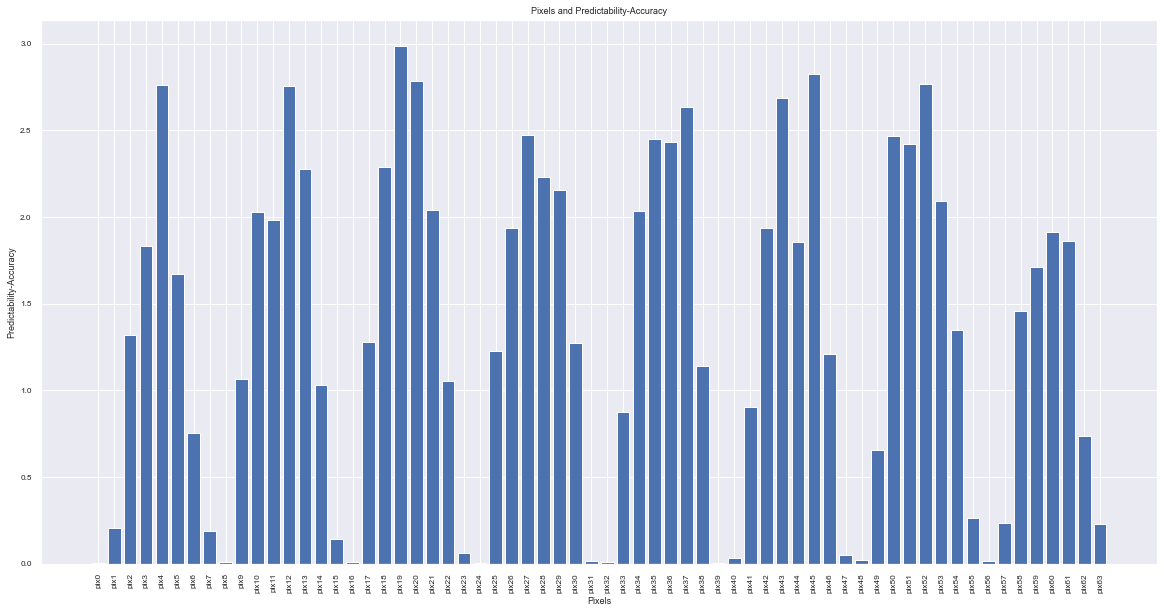

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

pixels = []
for i in range(len(COLUMNS)-1):
    pixels.append(COLUMNS[i])
predictability = []
for j in range(64):
    predictability.append(pixel_value(j))

plt.figure(figsize=(20,10))
sns.set_theme(font_scale=0.75)
plt.bar(pixels,predictability)
plt.title('Pixels and Predictability-Accuracy')
plt.xlabel('Pixels')
plt.ylabel('Predictability-Accuracy')
plt.grid(True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [83]:
output = 0
pix = 0

for k in range(64):
    pixval = pixel_value(k)
    if pixval > output:
        output = pixval
        pix = k

print(f"Pixel {pix} is the least predictable with an average absolute error of {output}")

Pixel 27 is the least predictable with an average absolute error of 3.2227083498426716


In [87]:
output = 999999999
pix = 0

for k in range(64):
    pixval = pixel_value(k)
    if pixval < output:
        output = pixval
        pix = k

print(f"Pixel {pix} is the most predictable with an average absolute error of {output}")

Pixel 0 is the most predictable with an average absolute error of 0.005406343586112688


##### As shown above, the most predictable pixel is Pix0 and the least predictable pixel is Pix27. These values do make sense. Pixel 0 is at the top left of the image that composes the digit. That pixel will almost always, if not always, be the same value since it doesn't take part in composing the digit. It will stay as the value 0, which outputs a white pixel. On the other hand, pixel 27 is around the middle of the image, indicating that pix27 will almost always, if not always, vary in value. That pixel will almost always take part in composing the digit so that pixel value will vary between digits. Hence, it is the least predictable pixel. 

##### This means our model will have a much easier time predicting the value for pix0 than for pix27.

##### NOTE: the graph above shows different least and most predictable pixel values but we must recall that the pixel value predictability will always vary... especially with permutated values.